# Installing Dependencies

**upload train.csv and eda helper function file**

In [ ]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import eda_helper_functions

from sklearn.ensemble import IsolationForest

In [ ]:
train = pd.read_csv("/content/train.csv")
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-06-15,Chennai,Kolkata,19:35:00,21:55:00,140,0,No Info,3597
1,Air India,2019-06-12,Delhi,Cochin,17:15:00,09:25:00,970,2,No Info,9417
2,Air India,2019-03-06,Delhi,Cochin,09:00:00,07:40:00,1360,1,No Info,14882
3,Jet Airways,2019-05-06,Kolkata,Banglore,20:25:00,18:00:00,1295,1,In-flight meal not included,9314
4,Jet Airways,2019-06-15,Delhi,Cochin,09:00:00,12:35:00,1655,1,In-flight meal not included,10262
...,...,...,...,...,...,...,...,...,...,...
635,Jet Airways,2019-03-06,Delhi,Cochin,13:00:00,18:50:00,350,1,No Info,17024
636,Air India,2019-03-06,Delhi,Cochin,05:55:00,07:40:00,1545,2,No Info,14641
637,Air Asia,2019-03-12,Kolkata,Banglore,19:35:00,22:05:00,150,0,No Info,4384
638,Air Asia,2019-06-12,Kolkata,Banglore,07:35:00,19:25:00,710,1,No Info,5192


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   airline          640 non-null    object
 1   date_of_journey  640 non-null    object
 2   source           640 non-null    object
 3   destination      640 non-null    object
 4   dep_time         640 non-null    object
 5   arrival_time     640 non-null    object
 6   duration         640 non-null    int64 
 7   total_stops      640 non-null    int64 
 8   additional_info  640 non-null    object
 9   price            640 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 50.1+ KB


In [ ]:
# change the dtypes of - date_of_journey, dep_time, arrival_time

train = train.assign(**{
        col : pd.to_datetime(train.loc[:,col],dayfirst=True, format="mixed")
        for col in ["date_of_journey", "dep_time", "arrival_time"]
    })

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    int64         
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), int64(3), object(4)
memory usage: 50.1+ KB


# HIGH LEVEL SUMMARY AND ANALYSIS
  1. MISSING VALUE ANALYSIS
  2. OUTLIER ANALYSIS
  3. CORRELATION ANALYSIS

In [ ]:
train.describe(include="number")

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,609.000000,0.767188,8987.146875
std,489.151096,0.643142,4908.673441
min,75.000000,0.000000,1965.000000
25%,175.000000,0.000000,5196.500000
50%,467.500000,1.000000,7971.500000
75%,910.000000,1.000000,12090.250000
max,2295.000000,3.000000,54826.000000


**max duration is 2295mins = 38 hours(must be ouliers)**

In [ ]:
(
    train
    .assign(total_stops=train["total_stops"].astype(object))
    .describe(include="object")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640,640
unique,8,5,6,4,5
top,Jet Airways,Delhi,Cochin,1,No Info
freq,233,257,257,344,493




*   1/3 flights are from jet airways
*   most frequent source and destination is delhi and coachin respectively
*   more than 50% flights are having only one stop



In [ ]:
# missing values
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


In [ ]:
#outlier - duration,
forest = IsolationForest(n_estimators=10, random_state=42)
(
	train
	.assign(outlier=forest.fit_predict(
		train
		.drop(columns="price")
		.select_dtypes(include="number")
	))
	.query("outlier == -1")
	.duration
  .describe()
)

,duration
count,241.000000
mean,791.410788
std,660.614362
min,75.000000
25%,145.000000
50%,500.000000
75%,1430.000000
max,2295.000000


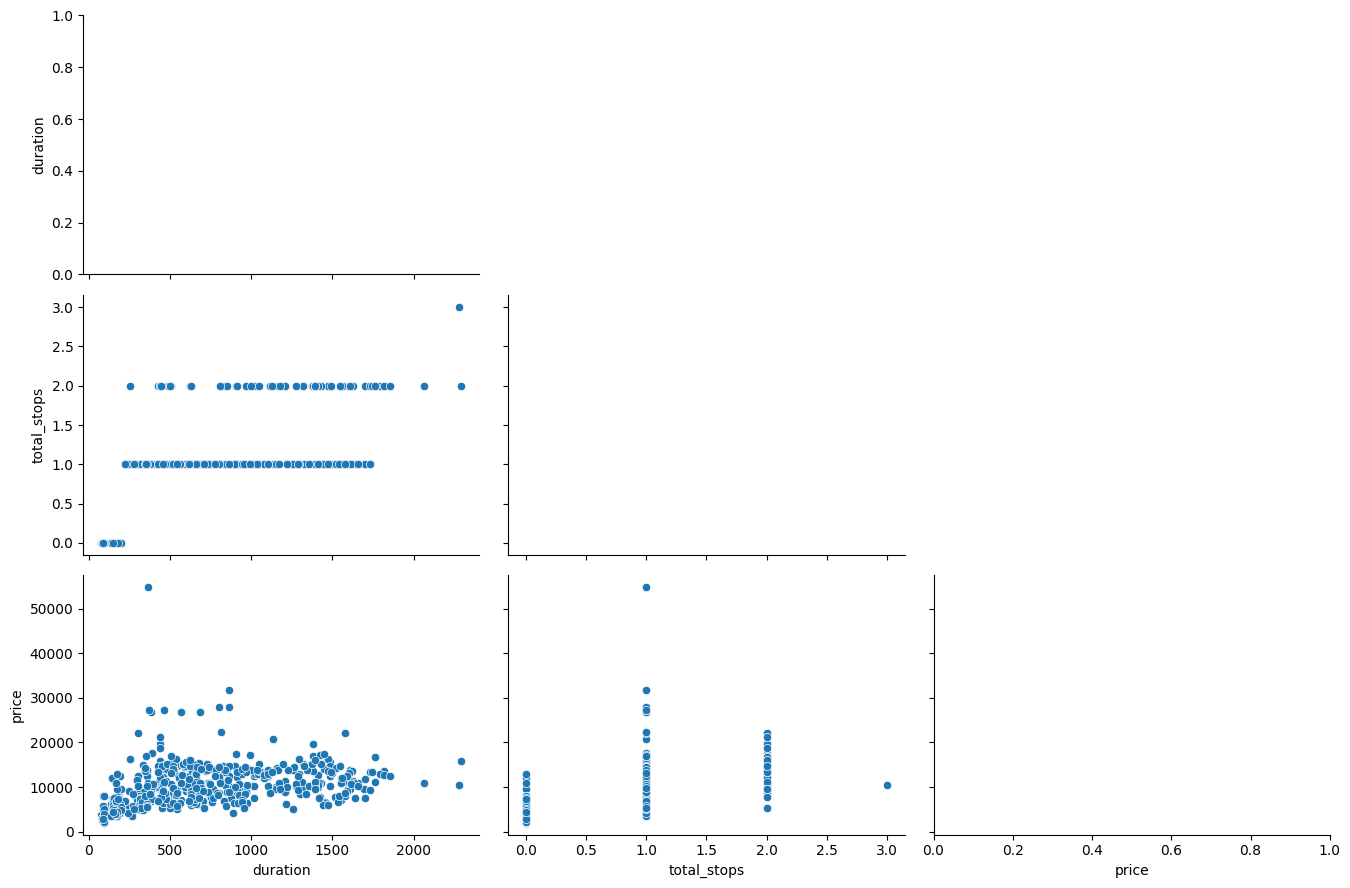

In [ ]:
# pair plots
eda_helper_functions.pair_plots(data=train)


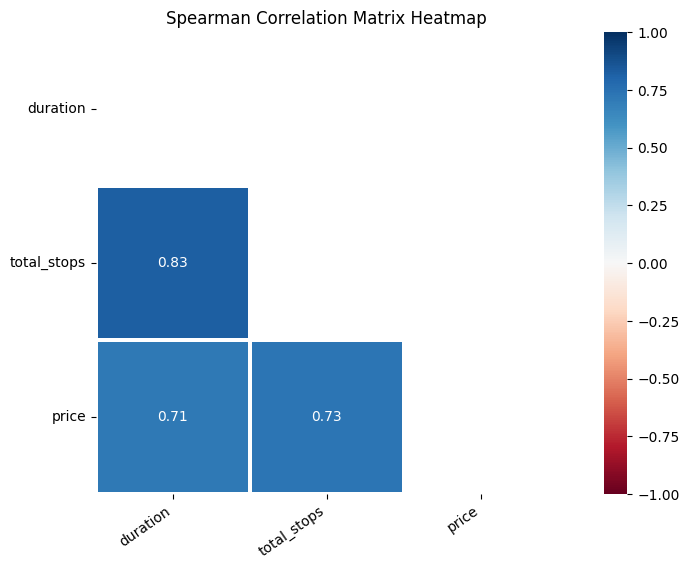

In [ ]:
# correlation analysis
eda_helper_functions.correlation_heatmap(train)

**total_stops and duration are highly co-related**

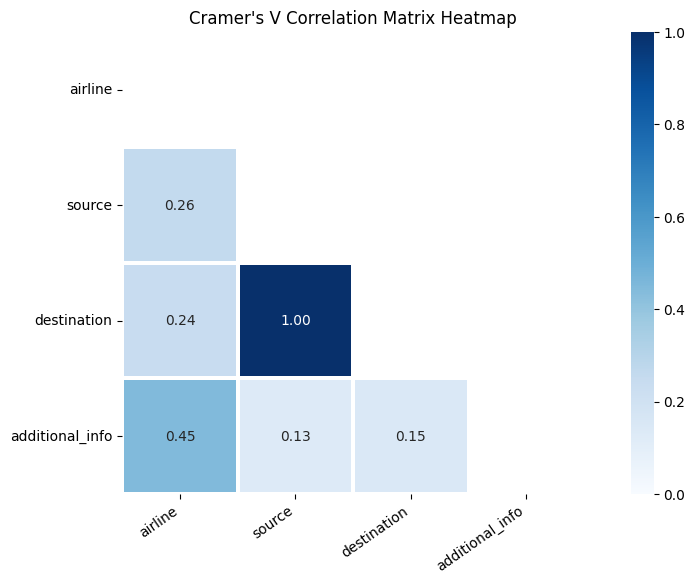

In [ ]:
# for cat variable
eda_helper_functions.cramersV_heatmap(train)

# DETAILED ANALYSIS

In [ ]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

# 1. Airline


In [ ]:
eda_helper_functions.cat_summary(train,"airline")

,airline
0,Indigo
1,Air India
2,Air India
3,Jet Airways
4,Jet Airways
...,...
635,Jet Airways
636,Air India
637,Air Asia
638,Air Asia


Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,233


,count,percentage
category,,
Jet Airways,233,0.364063
Indigo,141,0.220312
Air India,106,0.165625
Multiple Carriers,63,0.098437
Spicejet,40,0.062500
Vistara,23,0.035937
Air Asia,20,0.031250
Goair,14,0.021875


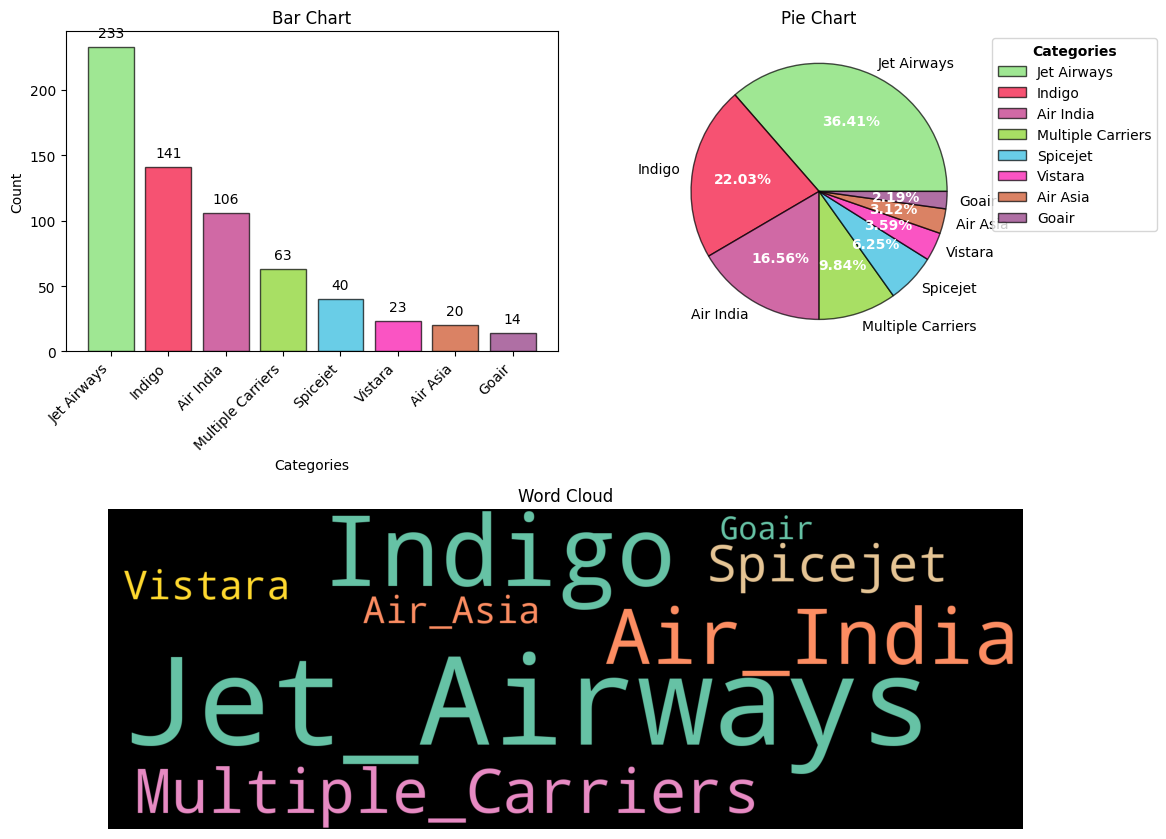

In [ ]:
eda_helper_functions.cat_univar_plots(train, "airline")
#eda_helper_functions.cat_univar_plots(train, "airline", show_wordcloud=False, k=3)

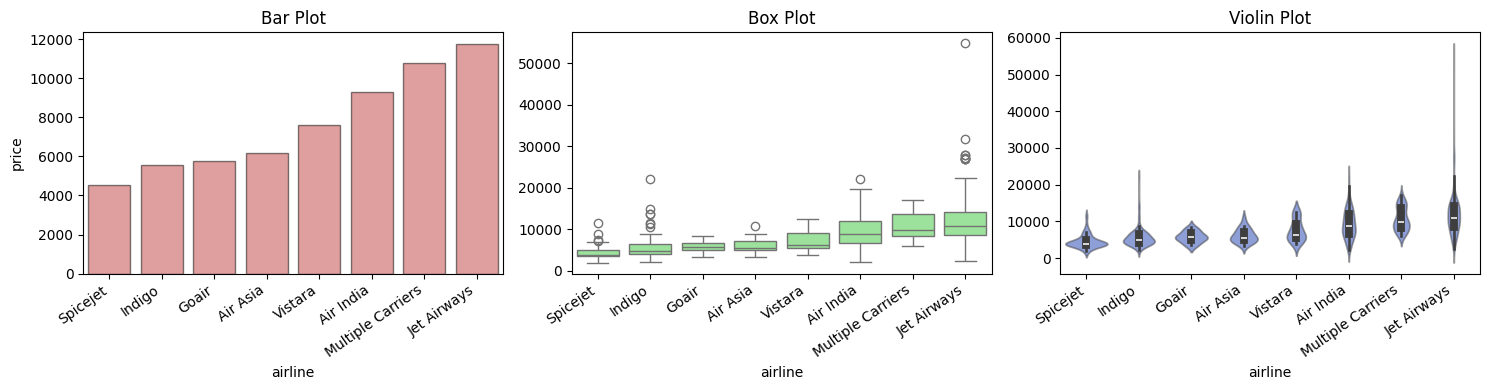

In [ ]:
eda_helper_functions.num_cat_bivar_plots(
	data=train,
	num_var="price",
	cat_var="airline"
)

**Hypothesis Testing**

In [ ]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 40.650975537279855
- p-value              : 2.8543435591611837e-47
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 276.6128783244239
- p-value              : 5.924756262346564e-56
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


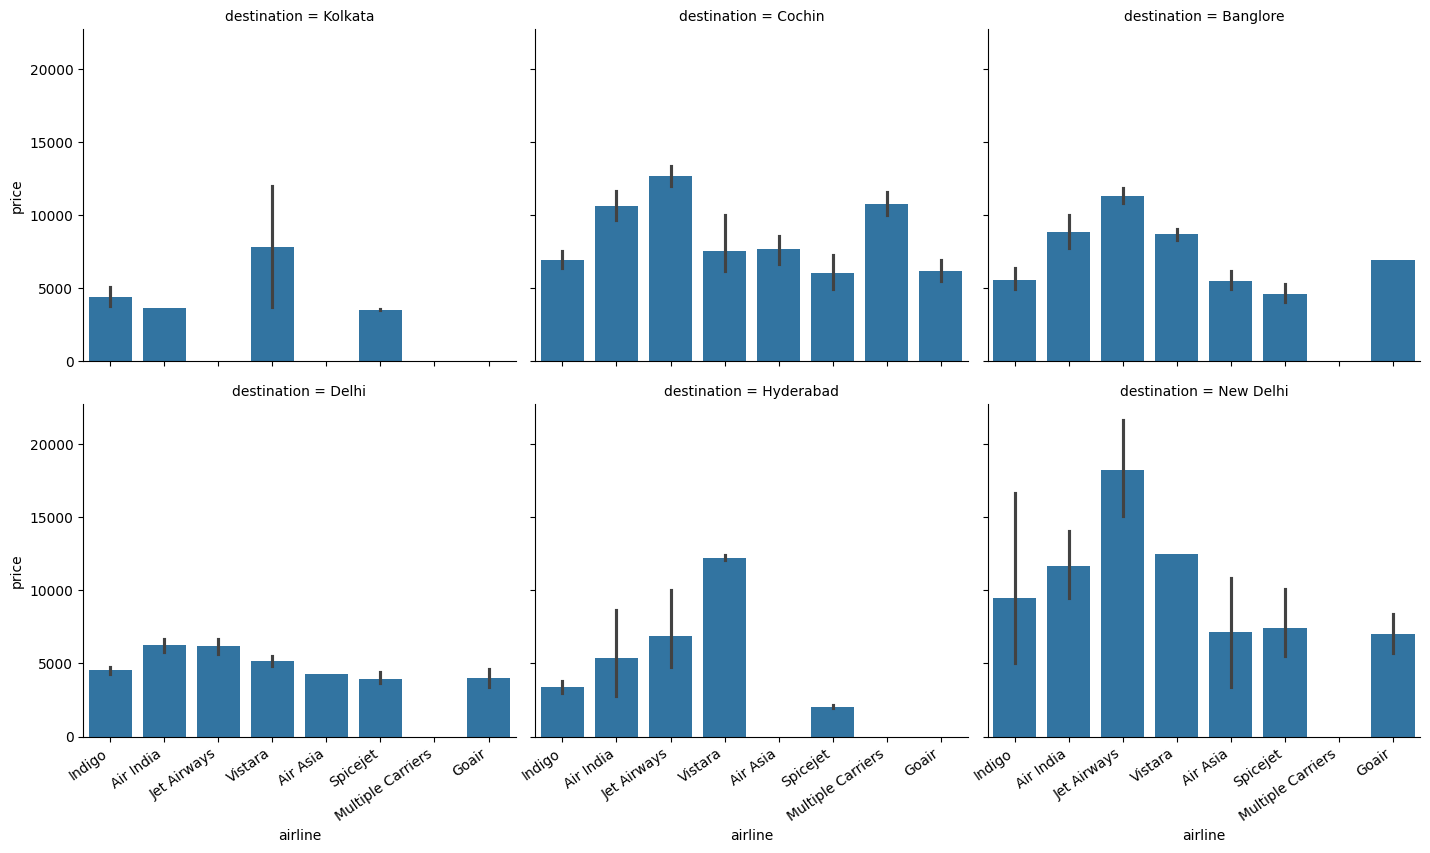

In [ ]:
airline_grid = sns.FacetGrid(
	data=train,
	col="destination",
	col_wrap=3,
	height=4,
	aspect=1.2,
	sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
	eda_helper_functions.rotate_xlabels(ax)

# 2. Source

In [ ]:
train.source.unique()

array(['Chennai', 'Delhi', 'Kolkata', 'Banglore', 'Mumbai'], dtype=object)

In [ ]:
train.destination.unique()

array(['Kolkata', 'Cochin', 'Banglore', 'Delhi', 'Hyderabad', 'New Delhi'],
      dtype=object)

In [ ]:
eda_helper_functions.cat_summary(train,"source")

,source
0,Chennai
1,Delhi
2,Delhi
3,Kolkata
4,Delhi
...,...
635,Delhi
636,Delhi
637,Kolkata
638,Kolkata


Data Type      : object
Cardinality    : 5 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,5
top,Delhi
freq,257


,count,percentage
category,,
Delhi,257,0.401562
Kolkata,172,0.268750
Banglore,146,0.228125
Mumbai,40,0.062500
Chennai,25,0.039062


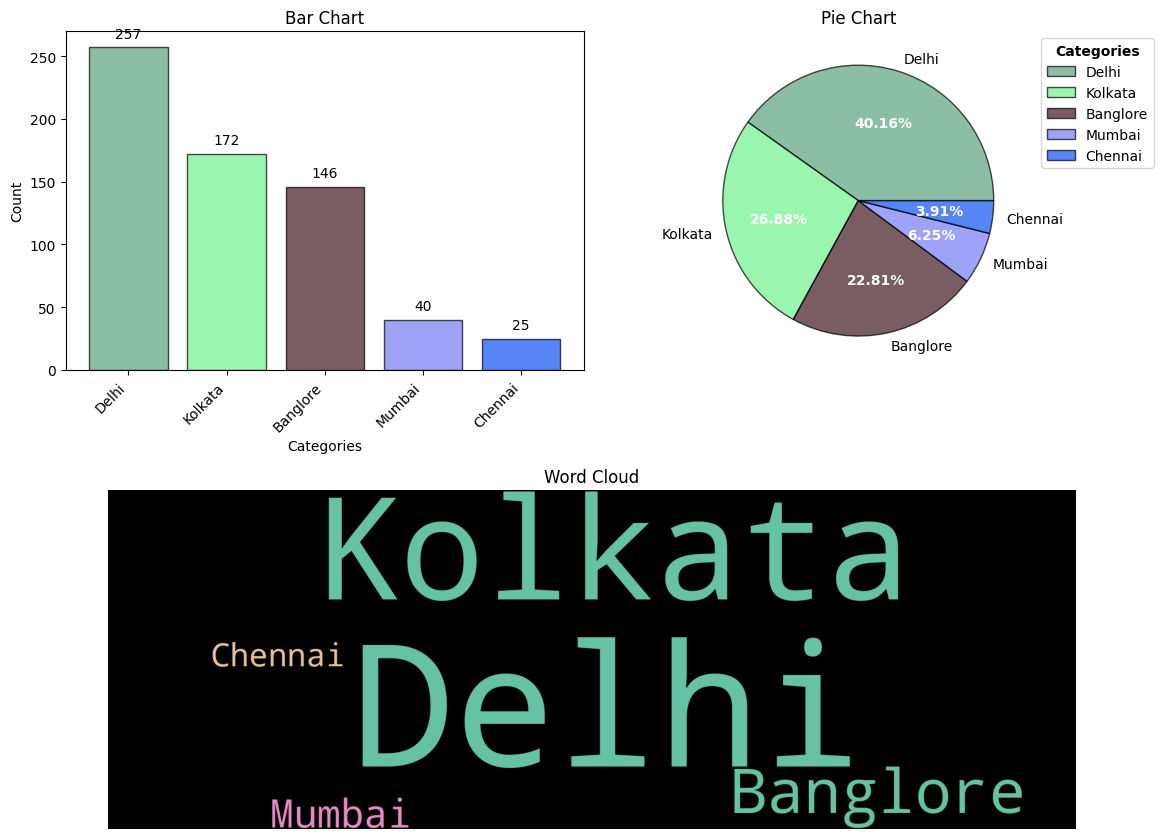

In [ ]:
eda_helper_functions.cat_univar_plots(train, "source")

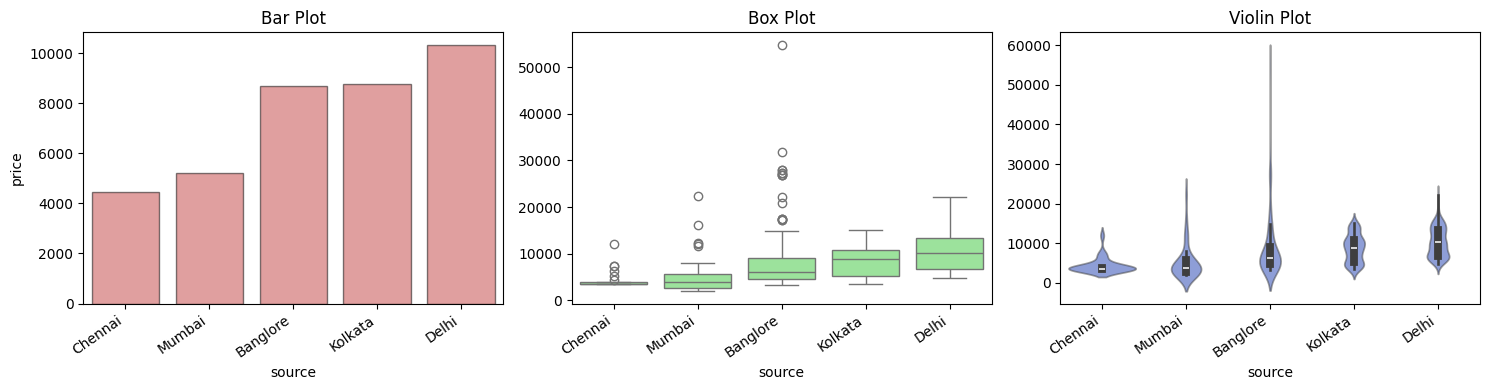

In [ ]:
eda_helper_functions.num_cat_bivar_plots(
	data=train,
	num_var="price",
	cat_var="source"
)

In [ ]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "source")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 17.85493214823289
- p-value              : 6.653265044134453e-14
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and source are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 135.90252390701366
- p-value              : 2.126591699061331e-28
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and source are associated to each other


## 3. Destinations

In [ ]:
train.destination.unique()

array(['Kolkata', 'Cochin', 'Banglore', 'Delhi', 'Hyderabad', 'New Delhi'],
      dtype=object)

In [ ]:
eda_helper_functions.cat_summary(train,"destination")

,destination
0,Kolkata
1,Cochin
2,Cochin
3,Banglore
4,Cochin
...,...
635,Cochin
636,Cochin
637,Banglore
638,Banglore


Data Type      : object
Cardinality    : 6 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,6
top,Cochin
freq,257


,count,percentage
category,,
Cochin,257,0.401562
Banglore,172,0.268750
Delhi,93,0.145313
New Delhi,53,0.082812
Hyderabad,40,0.062500
Kolkata,25,0.039062


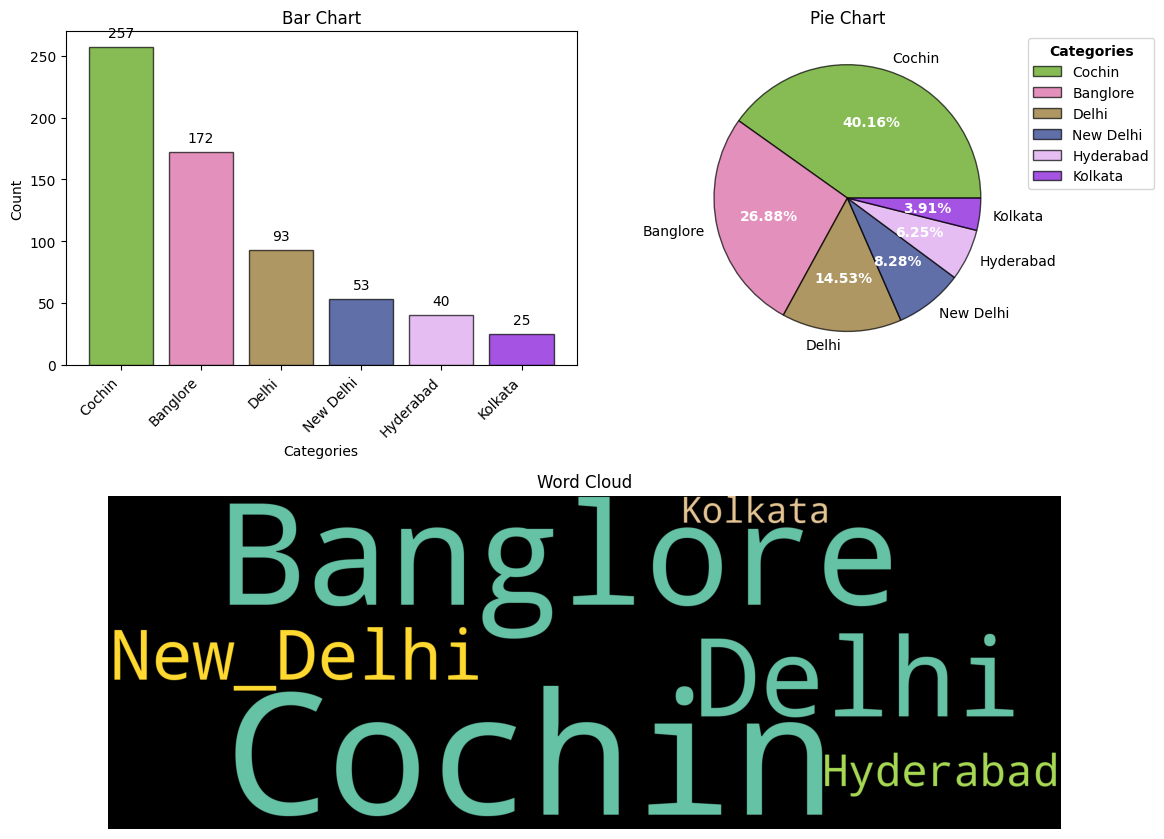

In [ ]:
eda_helper_functions.cat_univar_plots(train, "destination")

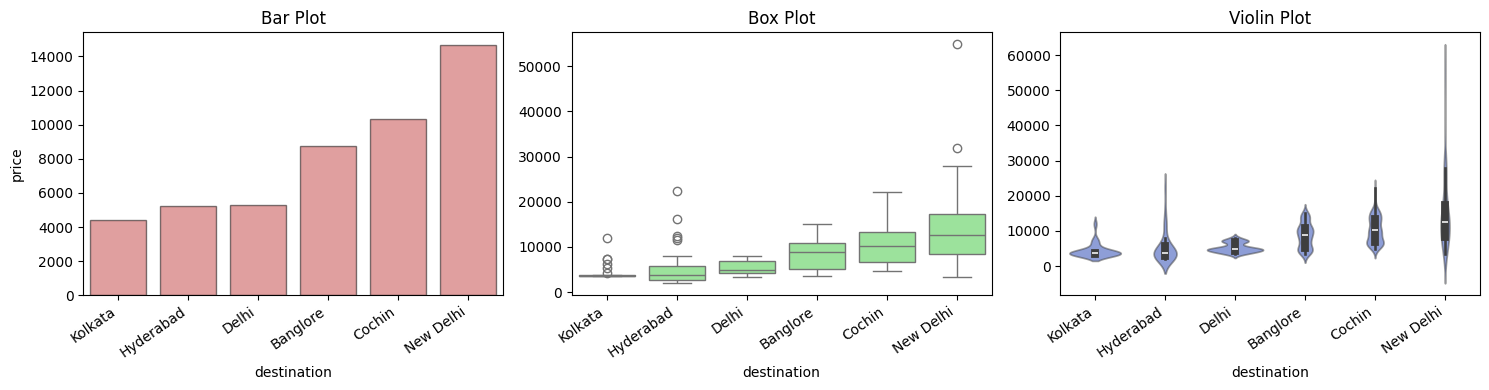

In [ ]:
eda_helper_functions.num_cat_bivar_plots(
	data=train,
	num_var="price",
	cat_var="destination"
)

In [ ]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "destination")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 52.7337080315226
- p-value              : 9.159401035440346e-46
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and destination are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 227.19679536737118
- p-value              : 4.265664715263539e-47
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and destination are associated to each other


#   4. Date of journey

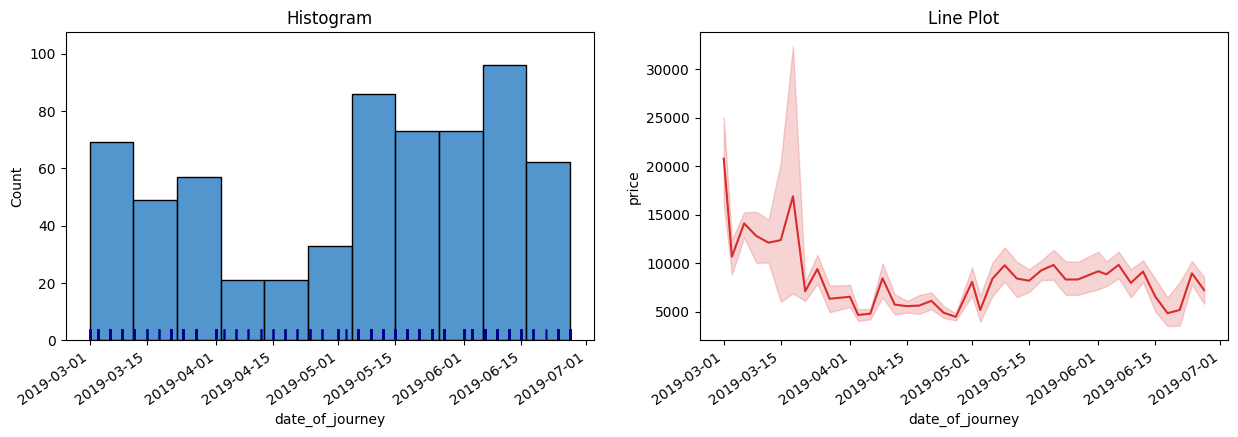

In [ ]:
eda_helper_functions.dt_univar_plots(
	data=train,
	var="date_of_journey",
	target="price"
)

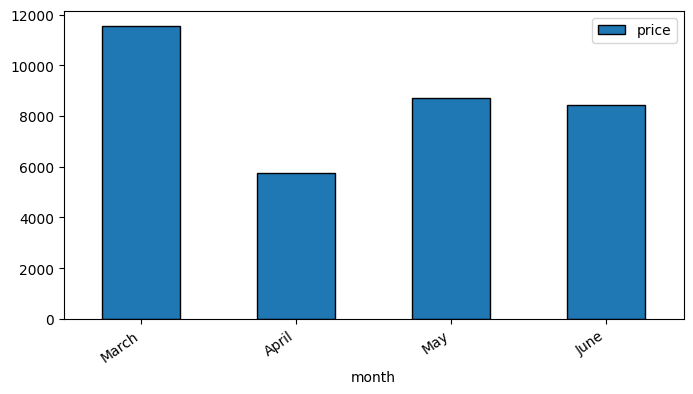

In [ ]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="M"))
	.price.mean()
	.to_frame()
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

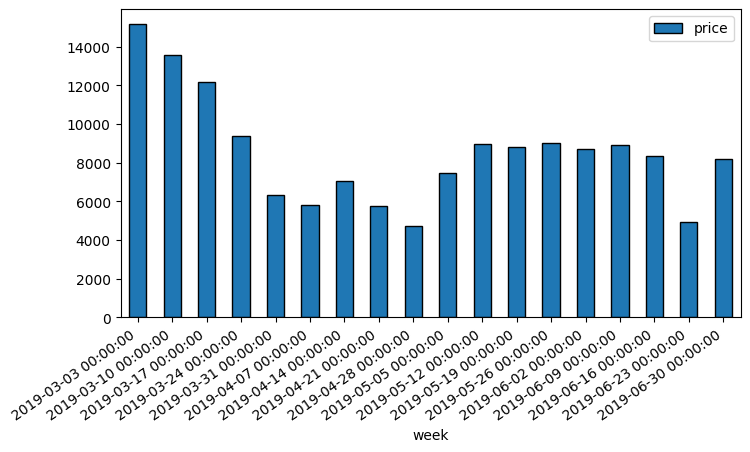

In [ ]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="W"))
	.price.mean()
	.to_frame()
	.rename_axis(index="week")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

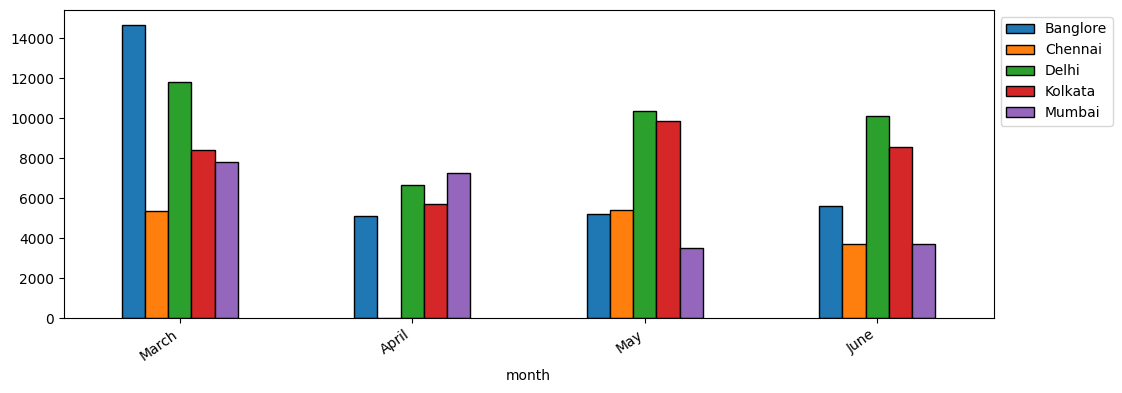

In [ ]:
(
	train
	.groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
	.price.mean()
	.unstack(fill_value=0)
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(12, 4),
		edgecolor="black"
	)
)

ax = plt.gca()

ax.legend(
	loc="upper left",
	bbox_to_anchor=(1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

#  5. Dep time and Arrival time

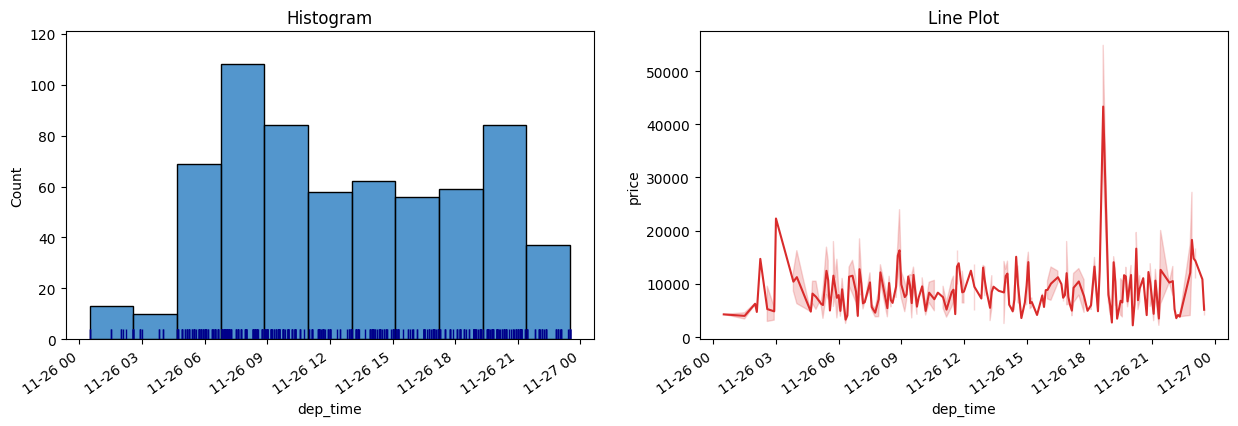

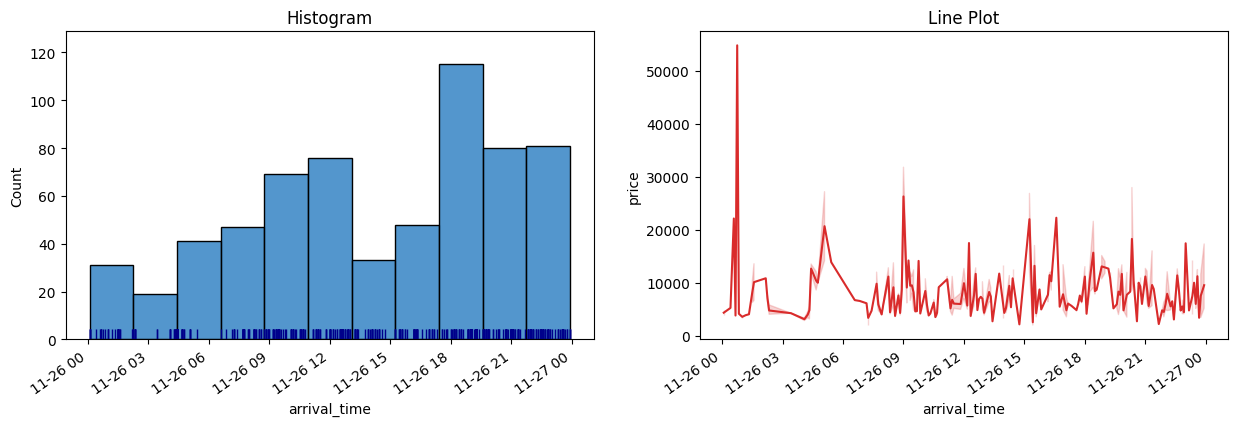

In [ ]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")
eda_helper_functions.dt_univar_plots(train, "arrival_time", "price")

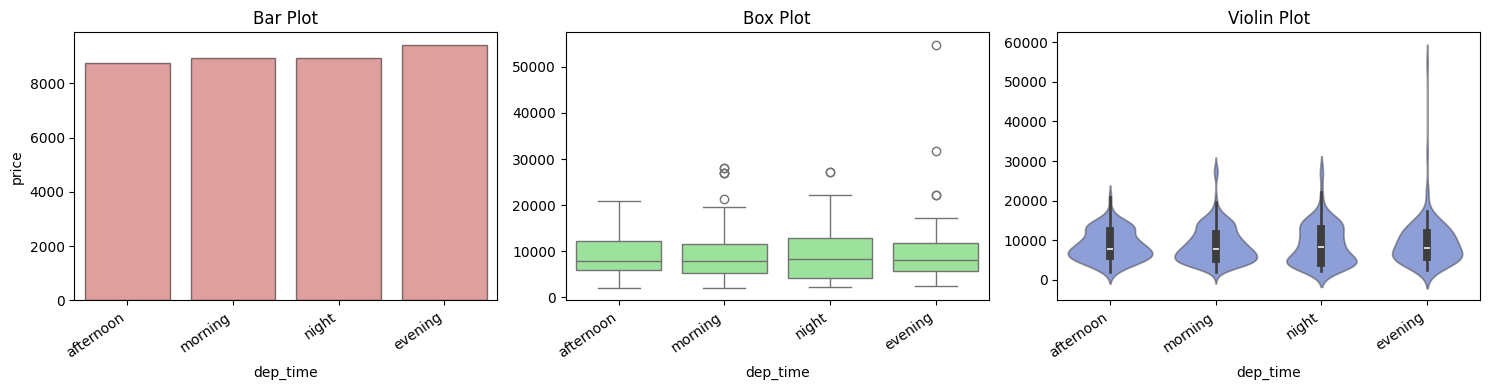

In [ ]:
(
	train
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)

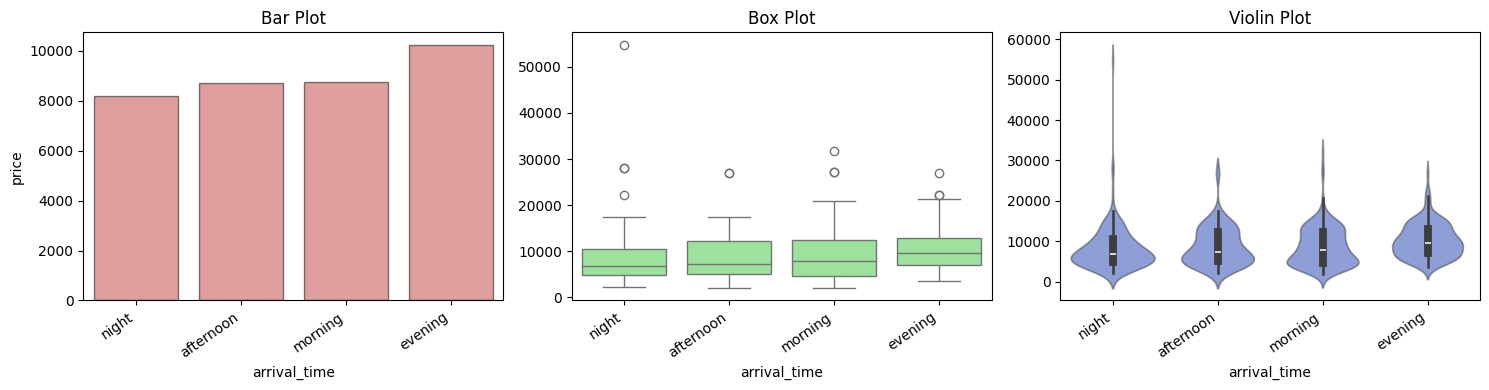

In [ ]:
(
	train
	.assign(arrival_time=lambda df_: (
		np.select([df_.arrival_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.arrival_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.arrival_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "arrival_time")
)

# Duration

In [ ]:
eda_helper_functions.num_summary(train, "duration")

,duration
0,140
1,970
2,1360
3,1295
4,1655
...,...
635,350
636,1545
637,150
638,710


Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.00
5,90.00
10,145.00
25,175.00
50,467.50
75,910.00
90,1420.50
95,1580.50
99,1781.35


,value
mean,609.000000
trimmed mean (5%),575.902778
trimmed mean (10%),545.908203
median,467.500000


,value
var,239268.794992
std,489.151096
IQR,735.000000
mad,302.500000
coef_variance,0.803204


,value
skewness,0.909504
kurtosis,-0.162626


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 3.6193117982563746e-22
Test Statistic       : 0.8759265211280785
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 26.990721211266873
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


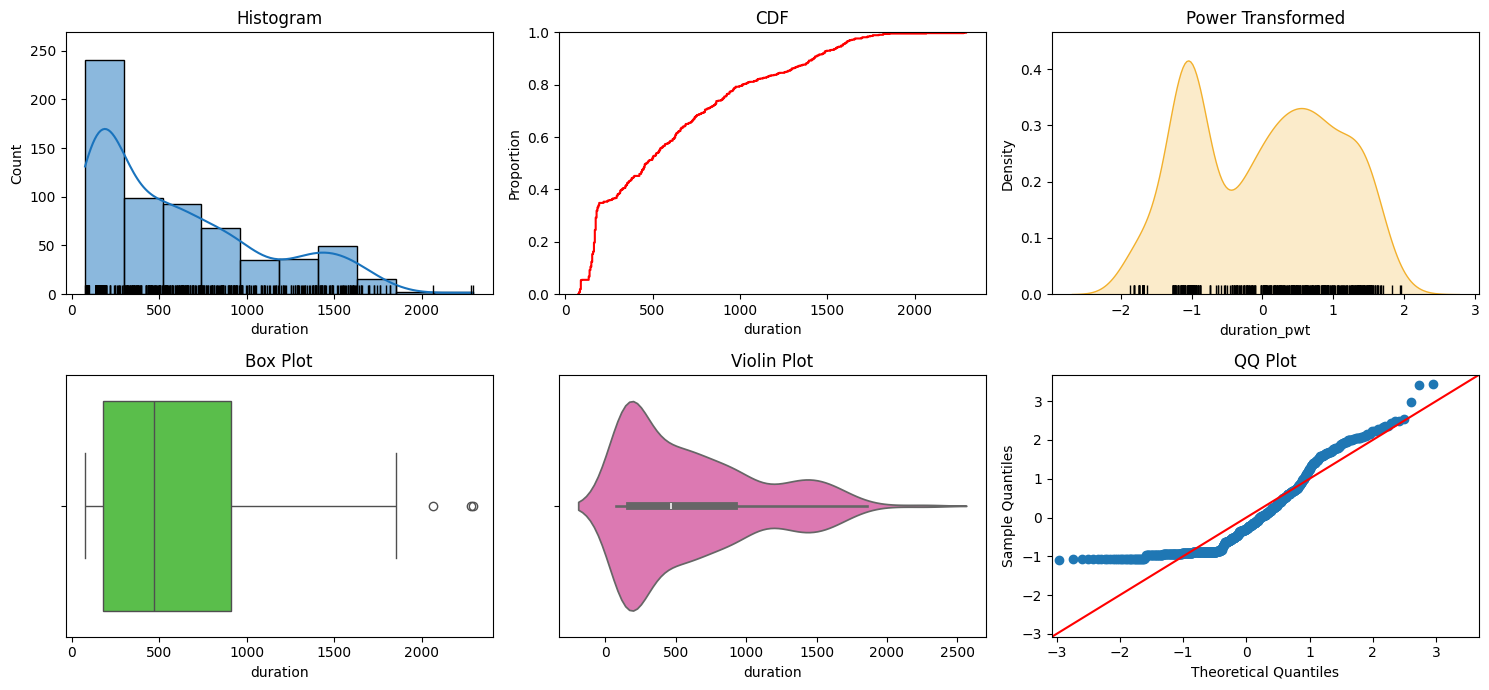

In [ ]:
eda_helper_functions.num_univar_plots(train, "duration")

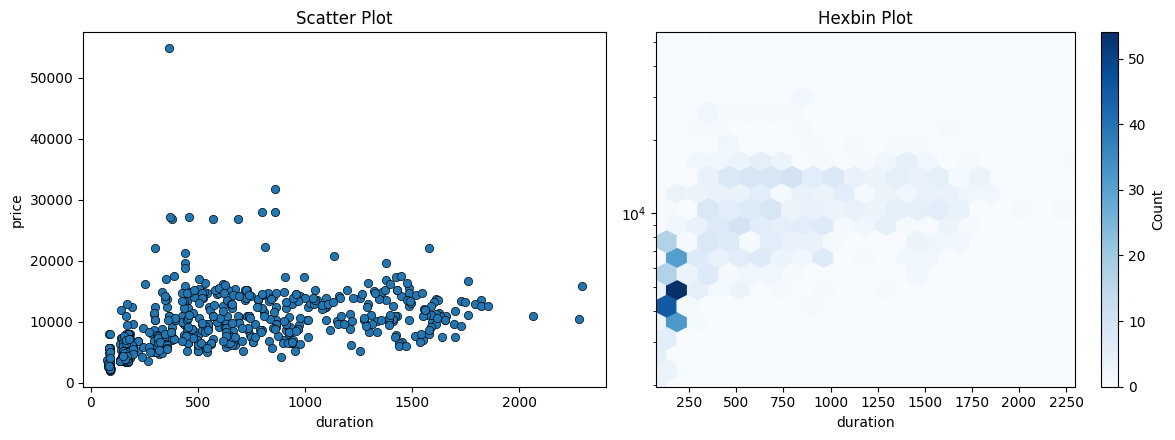

In [ ]:
eda_helper_functions.num_bivar_plots(
	train,
	"duration",
	"price",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)

In [ ]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.4724235986223231
- p-value              : 6.826229333949876e-37
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.7126297900320336
- p-value              : 2.67554180843264e-100
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


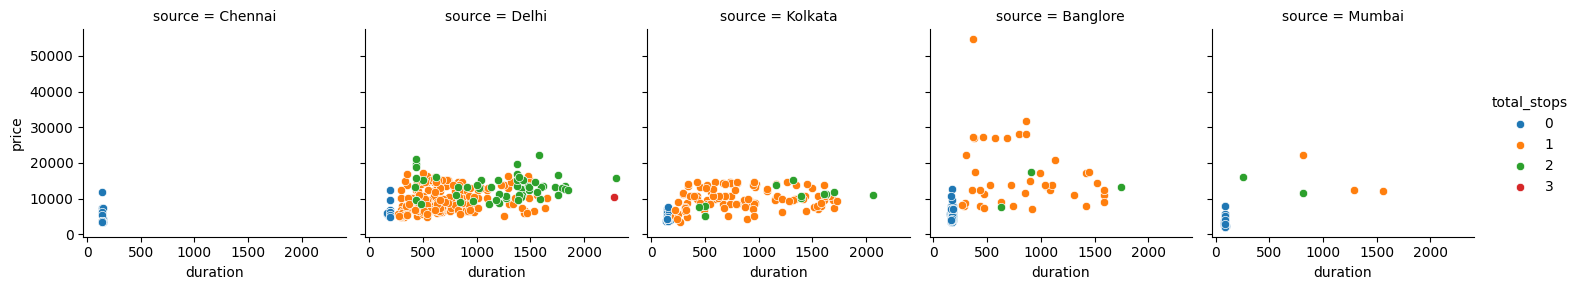

In [ ]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

In [ ]:
eda_helper_functions.get_iqr_outliers(train, "duration")

Lower Limit : -927.5
Upper Limit : 2012.5


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
400,Air India,2019-05-01,Kolkata,Banglore,2024-11-26 05:50:00,2024-11-26 16:15:00,2065,2,No Info,10991
566,Air India,2019-06-03,Delhi,Cochin,2024-11-26 05:15:00,2024-11-26 19:15:00,2280,3,No Info,10493
136,Jet Airways,2019-03-06,Delhi,Cochin,2024-11-26 05:30:00,2024-11-26 19:45:00,2295,2,In-flight meal not included,15864
